In [1]:
import numpy as np
import matplotlib.pyplot as plt

import services.data_service as svc
from data import mongo_setup

In [2]:
# setting the global parameters for mongoDB
mongo_setup.global_init()

In [3]:
# setting global values
sort_names = ['selection_sort', 'bubble_sort', 'insertion_sort', 'cocktail_sort', 'radix_sort', 'merge_sort', 'quick_sort_iterative', 'gnome_sort', 'shell_sort', 'tree_sort', 'tim_sort']

In [50]:
# fetching and storing the required data from db
formatted_data = []
for sort_name in sort_names:
    print(f'\n {sort_name} : ')

    data_sort = svc.fetch_sorttime_using_name(sort_name)
    sorts = data_sort.sorts

    for sort_data in sorts:
        array_data = sort_data.array
        entry = {}
        entry['name'] = sort_name
        entry['time'] = sort_data.time_to_sort
        entry['access_count'] = sort_data.array_access_count
        entry['type'] = array_data.array_type
        
        formatted_data.append(entry)
        print(f'\t Time: {sort_data.time_to_sort} \t  Array access Count: {sort_data.array_access_count} \t Array type: {array_data.array_type}')


 selection_sort : 
	 Time: 59296875000.0 	  Array access Count: 509980226 	 Array type: random
	 Time: 63671875000.0 	  Array access Count: 504495000 	 Array type: linear

 bubble_sort : 
	 Time: 167312500000.0 	  Array access Count: 1498593456 	 Array type: random
	 Time: 86562500000.0 	  Array access Count: 999000000 	 Array type: linear

 insertion_sort : 
	 Time: 72375000000.0 	  Array access Count: 752502306 	 Array type: random
	 Time: 406250000.0 	  Array access Count: 2997000 	 Array type: linear

 cocktail_sort : 
	 Time: 143125000000.0 	  Array access Count: 1499387266 	 Array type: random
	 Time: 91359375000.0 	  Array access Count: 1000000000 	 Array type: linear

 radix_sort : 
	 Time: 3625000000.0 	  Array access Count: 10052070 	 Array type: random
	 Time: 2687500000.0 	  Array access Count: 8001000 	 Array type: linear

 merge_sort : 
	 Time: 8140625000.0 	  Array access Count: 37367048 	 Array type: random
	 Time: 7609375000.0 	  Array access Count: 29816000 	 Array t

In [51]:
def plot_data(X, Y, size, xlabel, ylabel, title):
    fig = plt.figure(figsize = size) 
    
    # creating the bar plot 
    plt.bar(X, Y, color ='maroon', width = 0.4) 
    
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(title) 
    plt.show() 

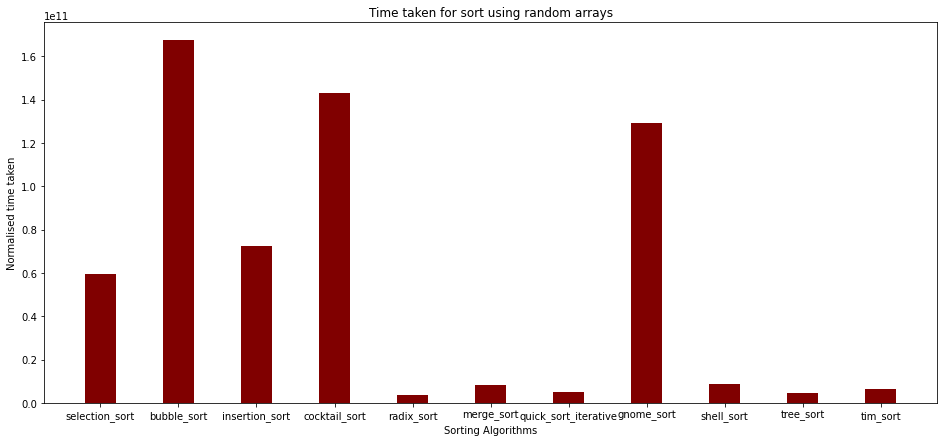

In [58]:
# filter the random array type times to sort
random_array_times = [(sort_data['name'], sort_data['time']) for sort_data in formatted_data if sort_data['type'] == 'random']
X_sort_names = [entry[0] for entry in random_array_times]
Y_times = [entry[1] for entry in random_array_times]

plot_data(X_sort_names, Y_times,(16, 7), "Sorting Algorithms", "Normalised time taken", "Time taken for sort using random arrays")

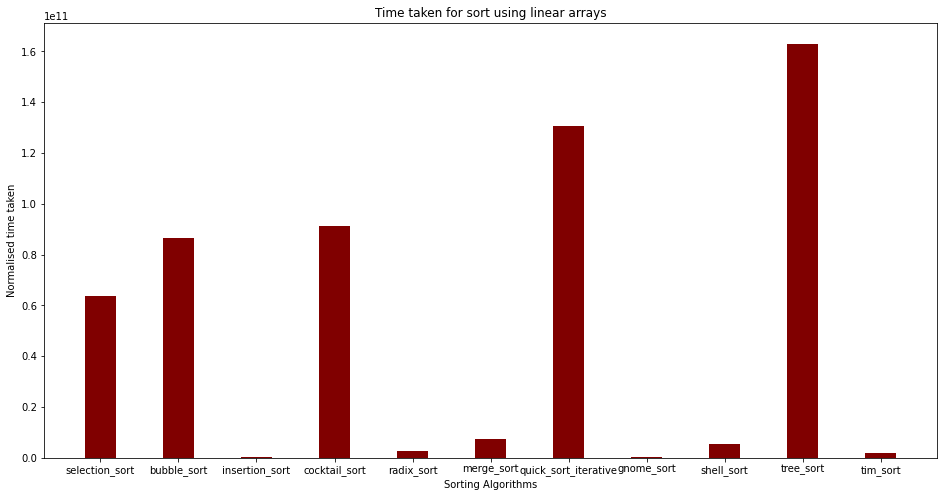

In [59]:
# filter the linear array type times to sort
linear_array_times = [(sort_data['name'], sort_data['time']) for sort_data in formatted_data if sort_data['type'] == 'linear']
X_sort_names_linear = [entry[0] for entry in linear_array_times]
Y_times_linear = [entry[1] for entry in linear_array_times]

plot_data(X_sort_names_linear, Y_times_linear,(16, 8), "Sorting Algorithms", "Normalised time taken", "Time taken for sort using linear arrays")

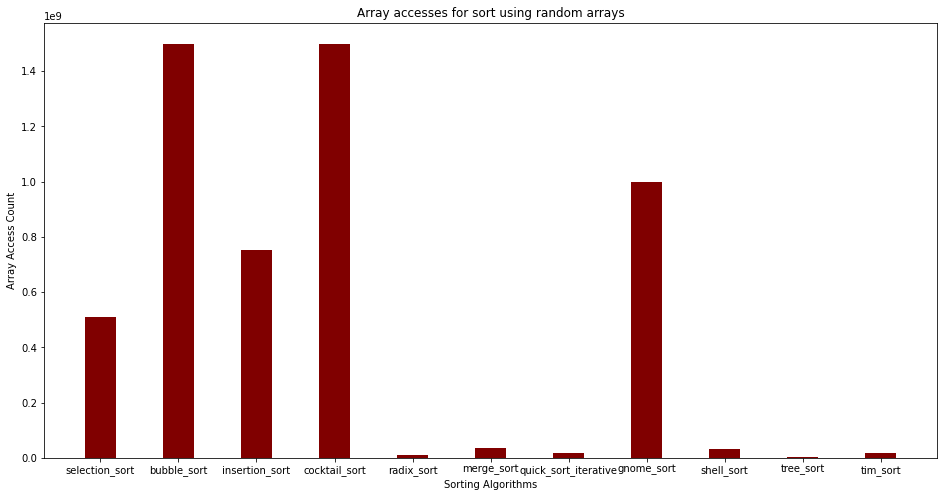

In [60]:
# array access counts random arrays
random_access_count = [(sort_data['name'], sort_data['access_count']) for sort_data in formatted_data if sort_data['type'] == 'random']
X_sort_names = [entry[0] for entry in random_access_count]
Y_access_count_random = [entry[1] for entry in random_access_count]

plot_data(X_sort_names, Y_access_count_random,(16, 8), "Sorting Algorithms", "Array Access Count", "Array accesses for sort using random arrays")

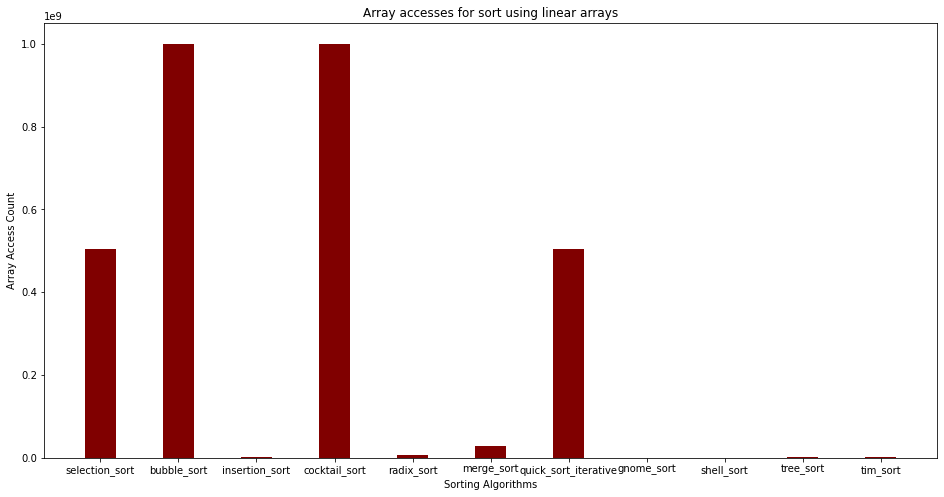

In [62]:
# array access count for linear arrays
linear_access_count = [(sort_data['name'], sort_data['access_count']) for sort_data in formatted_data if sort_data['type'] == 'linear']
X_sort_names_linear = [entry[0] for entry in linear_access_count]
Y_access_count_linear = [entry[1] for entry in linear_access_count]

plot_data(X_sort_names_linear, Y_access_count_linear,(16, 8), "Sorting Algorithms", "Array Access Count", "Array accesses for sort using linear arrays")